<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Combined).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-109-aa110c786001>:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()
<ipython-input-109-aa110c786001>:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


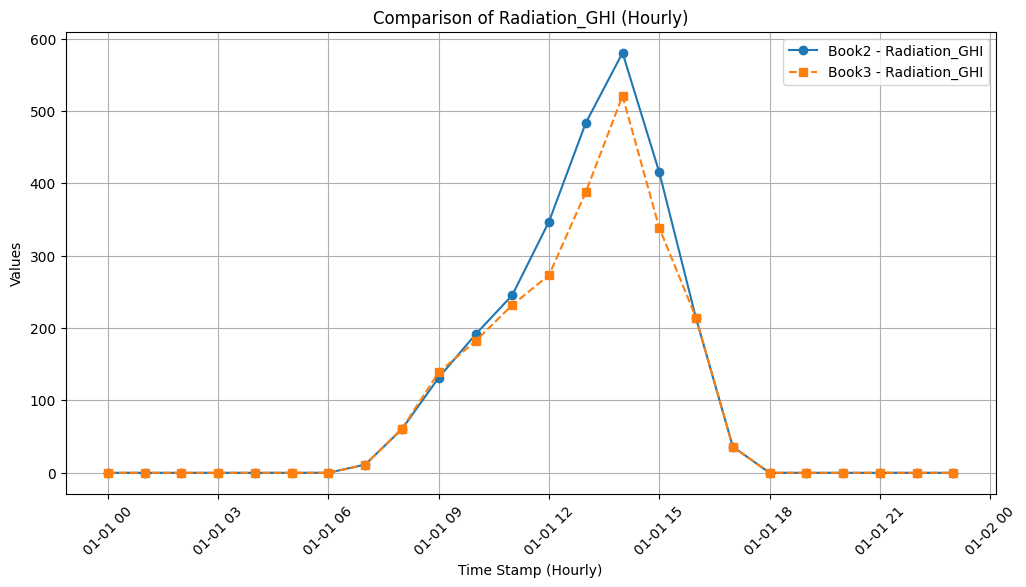

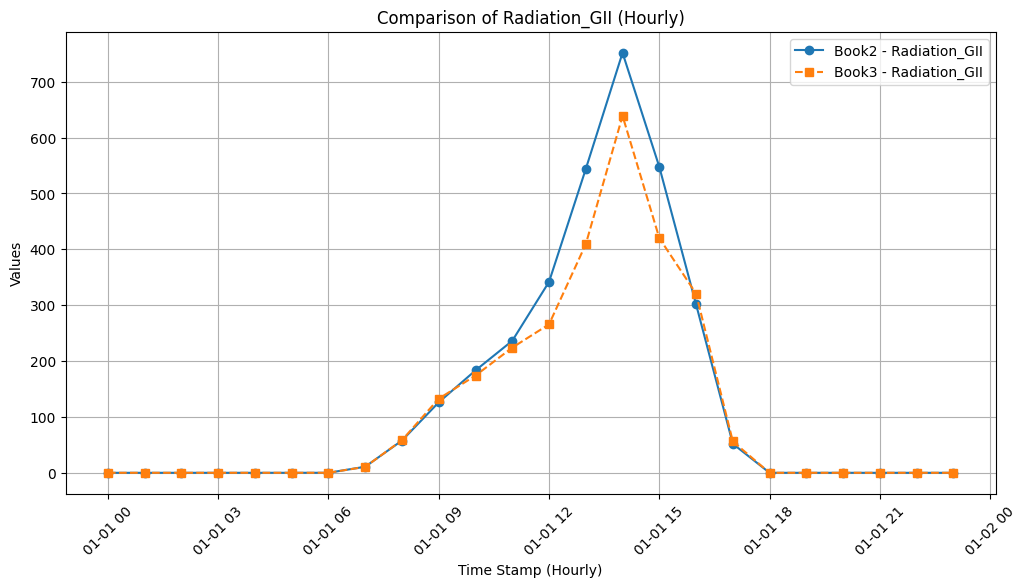

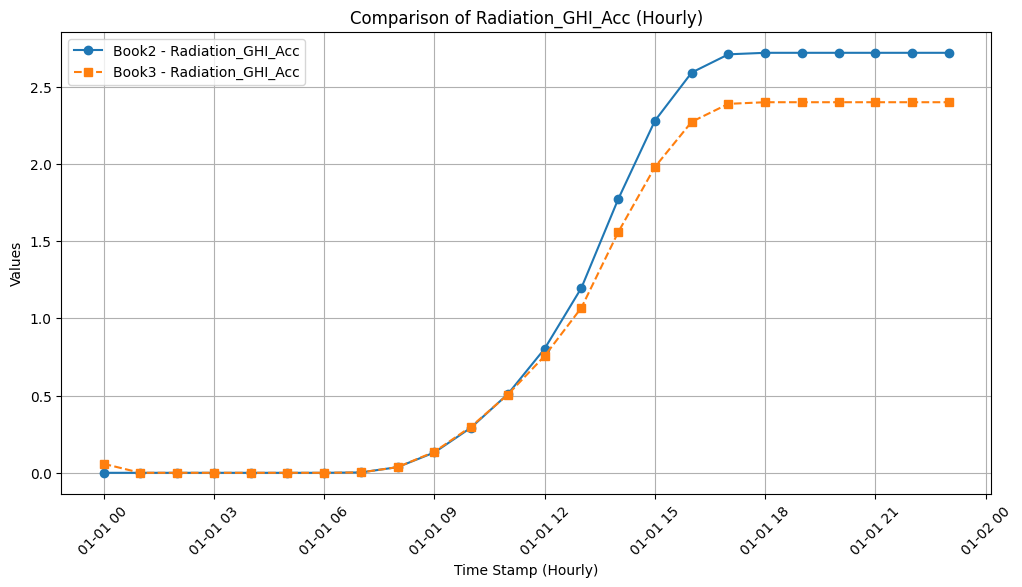

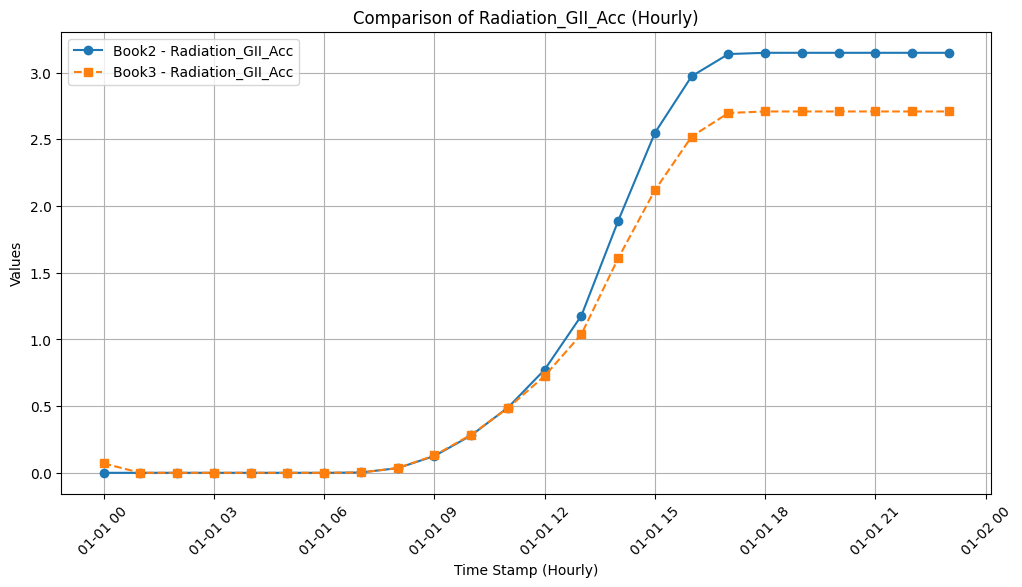

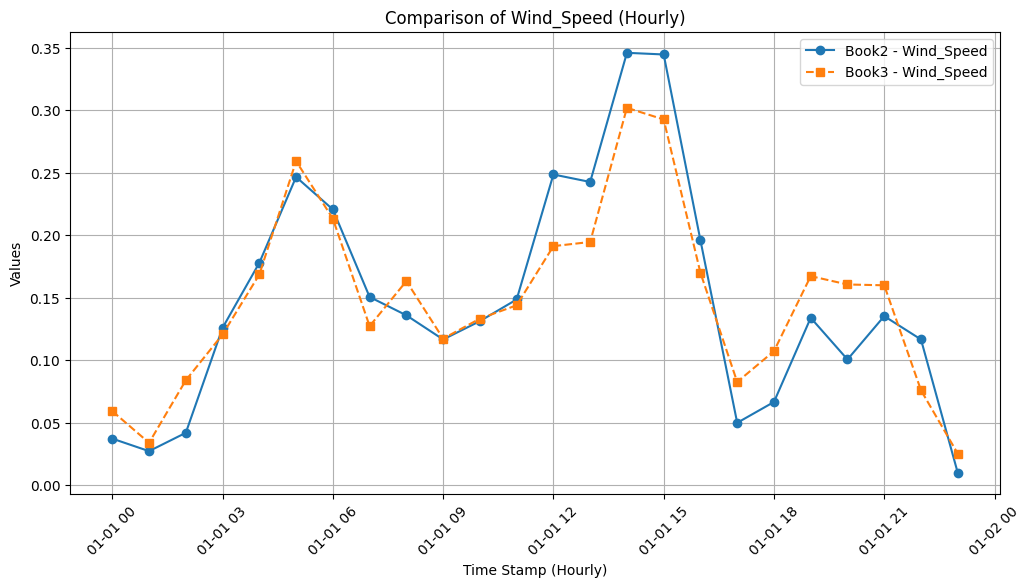

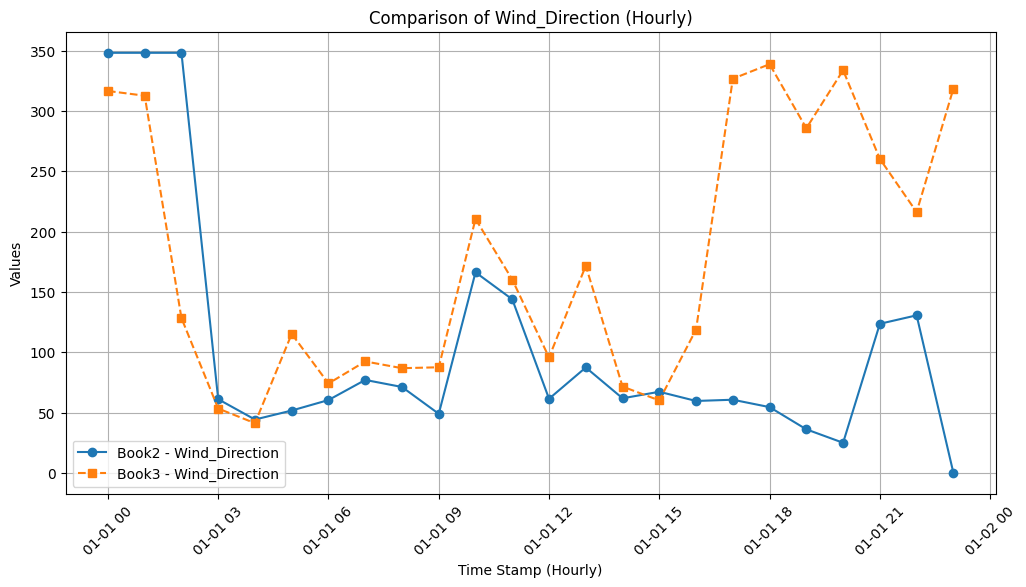

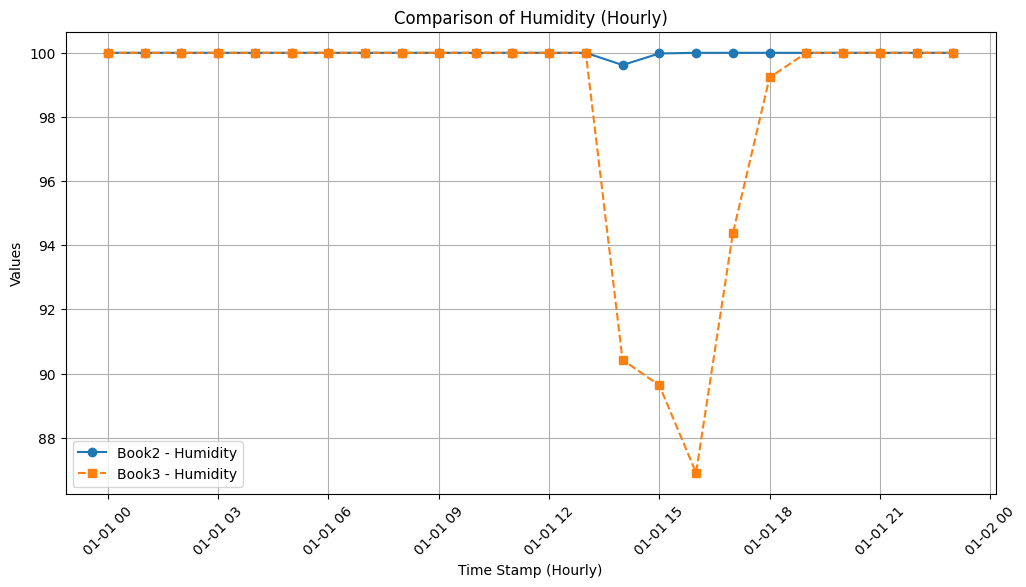

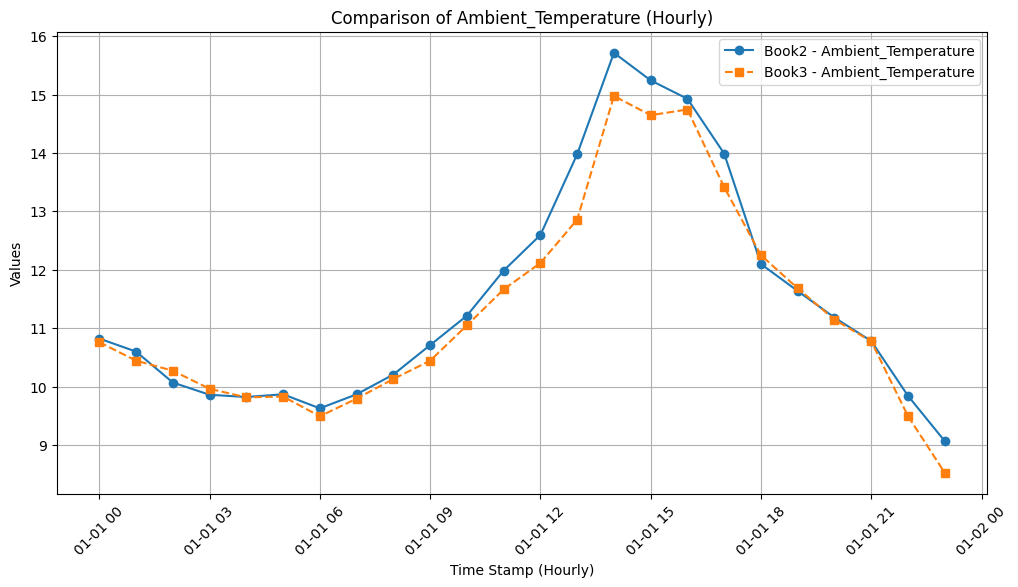

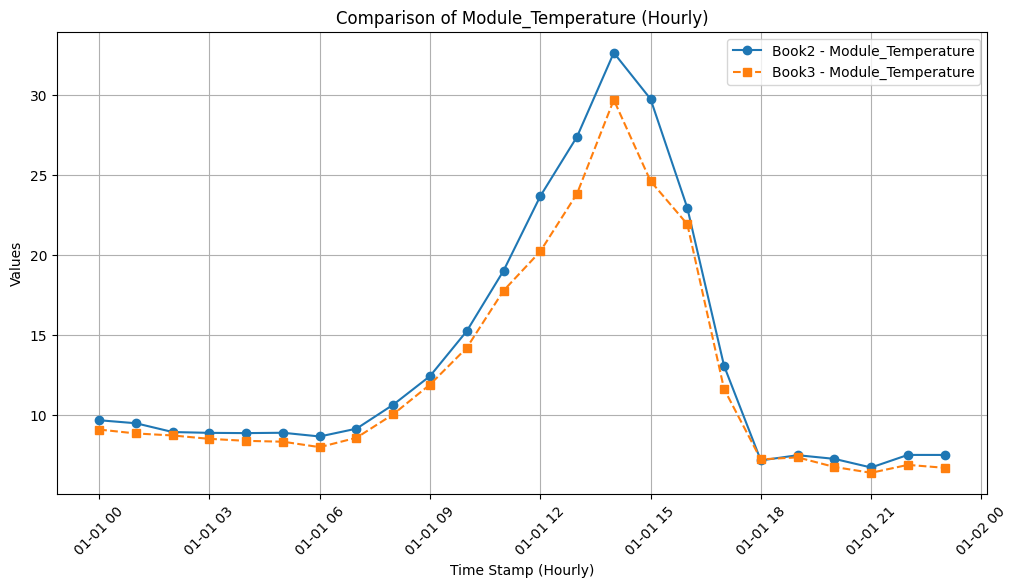

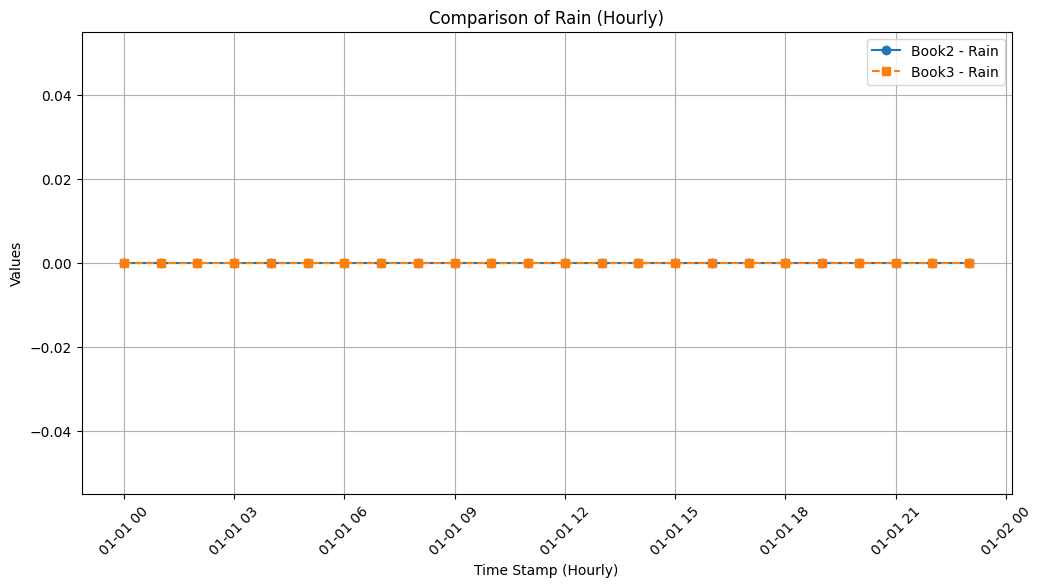

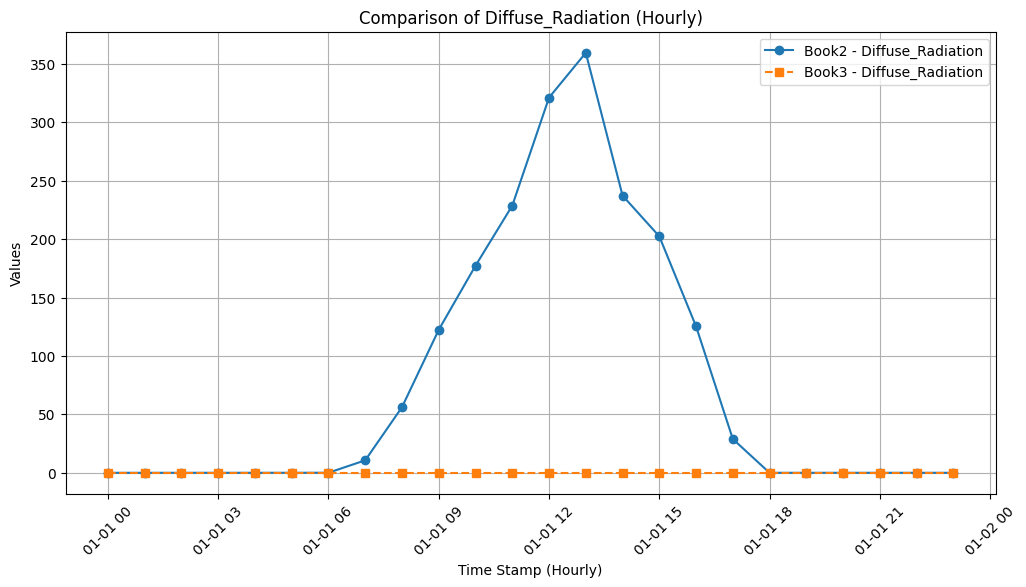

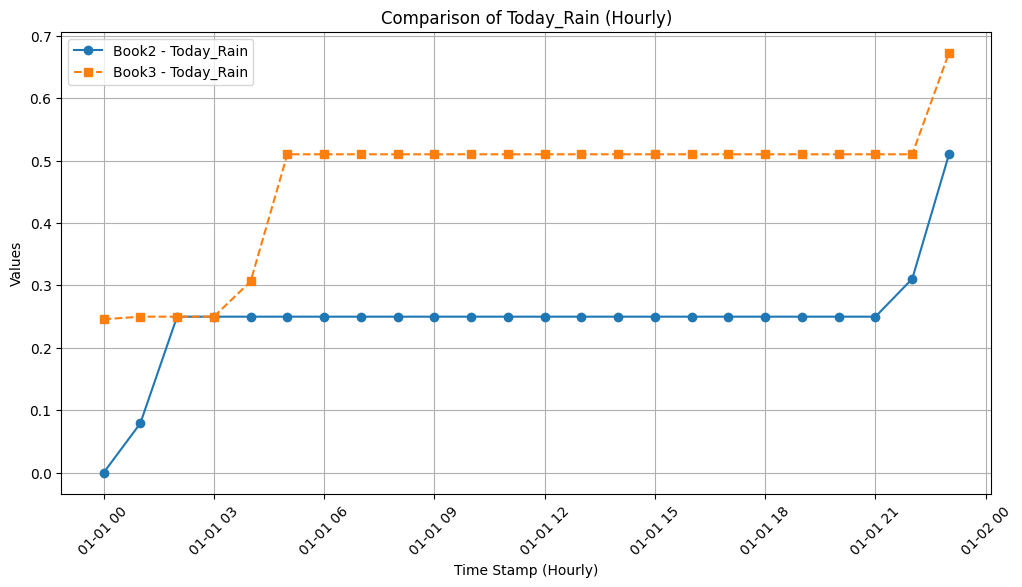

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Ensure df is not empty
    if df.empty:
        raise ValueError(f"The file {file_path} is empty or not properly formatted.")

    # Rename columns for consistency
    expected_columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                        "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                        "Ambient_Temperature", "Module_Temperature", "Rain",
                        "Diffuse_Radiation", "Today_Rain"]

    if len(df.columns) >= len(expected_columns):
        df.columns = expected_columns[:len(df.columns)]
    else:
      ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        raise ValueError("The dataset does not contain the expected number of columns.")

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("H").mean()

    return df_resampled

# Use uploaded file paths
df1 = load_and_process("/content/Book2.xlsx")
df2 = load_and_process("/content/Book3.xlsx")

# Get the column names (excluding timestamp)
columns = df1.columns

# Plot each column separately
for col in columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df1.index, df1[col], label="Book2 - " + col, marker='o', linestyle="-")
    plt.plot(df2.index, df2[col], label="Book3 - " + col, marker='s', linestyle="--")
    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Comparison of {col} (Hourly)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
